## TP2

Para la imagen suministrada “metal grid ”. Implementar un algoritmo
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos



In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

(350, 735, 3)


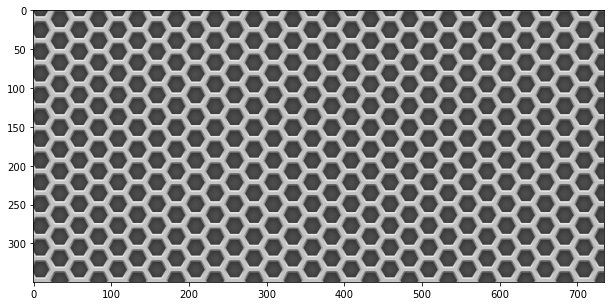

In [180]:
# Imagen original
img = cv.imread('metalgrid.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print(img.shape)
fig = plt.figure(figsize=(15,5))
plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
plt.show()

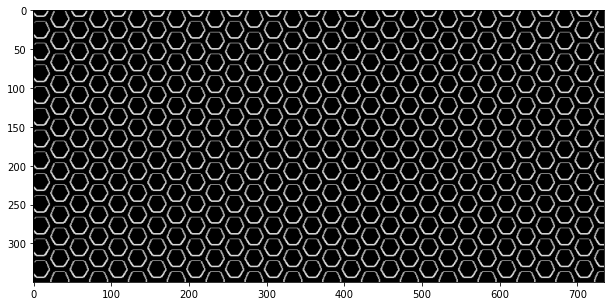

array([-179, -178, -177, -176, -175, -174, -173, -172, -166, -165, -164,
       -163, -162, -161, -160, -159, -158, -157, -156, -155, -154, -153,
       -152, -151, -150, -149, -148, -147, -146, -145, -144, -143, -142,
       -141, -137, -136, -135, -134, -133, -126, -122, -121, -120, -113,
       -112, -111, -101, -100,  -99,  -94,  -93,  -92,  -91,  -90,  -89,
        -88,  -87,  -86,  -81,  -80,  -79,  -69,  -68,  -67,  -60,  -59,
        -58,  -55,  -46,  -45,  -44,  -38,  -37,  -36,  -35,  -34,  -33,
        -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,  -23,  -22,
        -21,  -20,  -19,  -18,  -17,  -16,  -15,   -6,   -5,   -4,   -3,
         -2,   -1,    0,    2,    3,    4,   15,   16,   17,   21,   22,
         23,   28,   29,   30,   31,   32,   33,   34,   35,   36,   37,
         42,   43,   44,   45,   54,   55,   56,   58,   59,   60,   61,
         70,   71,   72,   76,   77,   78,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   

In [181]:
# angulos con maximo gradiente
blur = cv.GaussianBlur(img_gray,(5,5),0)

sobelx_64 = cv.Sobel(blur,cv.CV_64F,1,0, ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

# De igual modo para Sobely
sobely_64 = cv.Sobel(blur,cv.CV_64F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

mask_mag_max = (mag>=np.percentile(mag, 80))

fig = plt.figure(figsize=(15,5))
plt.imshow(mag * mask_mag_max, cmap = 'gray', vmin=0, vmax=255)
plt.show()

y = angle * mask_mag_max
np.unique(y.astype(np.int32))

In [182]:

def paintBorderMaxGradient(img_paint, img, ang, channel, percentil=95):
    blur = cv.GaussianBlur(img,(5,5),0)
    
    # Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(blur,cv.CV_64F,1,0, ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    # De igual modo para Sobely
    sobely_64 = cv.Sobel(blur,cv.CV_64F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)

    
    mask_mag_max = (mag>=np.percentile(mag, percentil))

    mask_angle = ((angle>ang-10) * (angle<ang+10))
    mask_mod = mask_mag_max * mask_angle

    img_paint[:,:,channel] = img_paint[:,:,channel] + (np.ones(img_paint.shape[:2])*mask_mod)*255




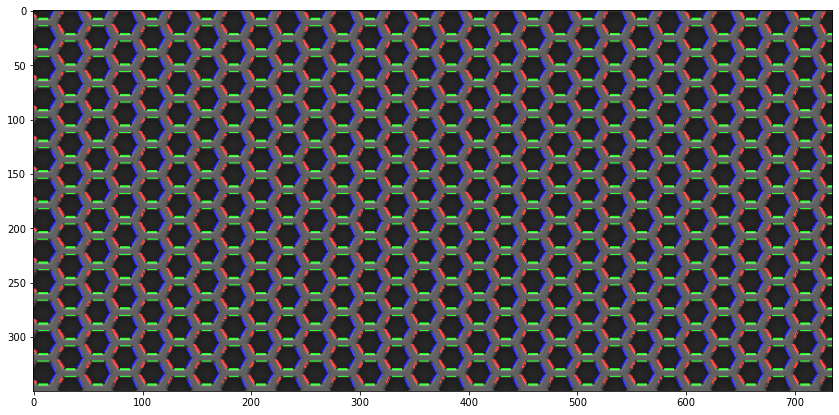

In [194]:
angles_list = [-25, 25, 90, -90, 145, -145]
channel_list = [0, 0, 1, 1, 2, 2]
img_new = np.zeros(img.shape, dtype=np.uint8)

for ang,ch in zip(angles_list, channel_list):
    paintBorderMaxGradient(img_new, img_gray, ang, ch, percentil=80)

# merge with imagen original
img_merge = cv.addWeighted(img, 0.5, img_new, 1, 0)


fig = plt.figure(figsize=(20,7))
plt.imshow(cv.cvtColor(img_merge, cv.COLOR_BGR2RGB))
plt.show()

(483, 724, 3)


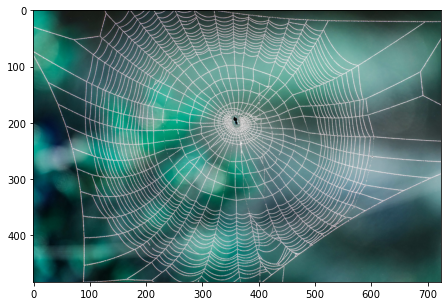

In [195]:
img = cv.imread('tela2.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

print(img.shape)
fig = plt.figure(figsize=(15,5))
plt.imshow(img, cmap = 'gray', vmin=0, vmax=255)
plt.show()

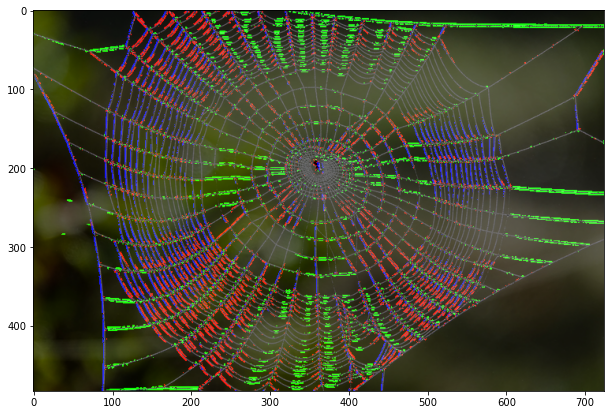

In [201]:
angles_list = [-25, 25, 90, -90, 145, -145, 0, -45, 45]
channel_list = [0, 0, 1, 1, 2, 2, 0, 2, 2]
img_new = np.zeros(img.shape, dtype=np.uint8)

for ang,ch in zip(angles_list, channel_list):
    paintBorderMaxGradient(img_new, img_gray, ang, ch, percentil=80)

# merge with imagen original
img_merge = cv.addWeighted(img, 0.5, img_new, 1, 0)


fig = plt.figure(figsize=(20,7))
plt.imshow(cv.cvtColor(img_merge, cv.COLOR_BGR2RGB))
plt.show()